In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("C:\\Users\\관리자\\Desktop\\인공지능 개론\\데이터 셋\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [76]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [77]:
data.shape

(768, 9)

<h3>#EDA 수행</h3>

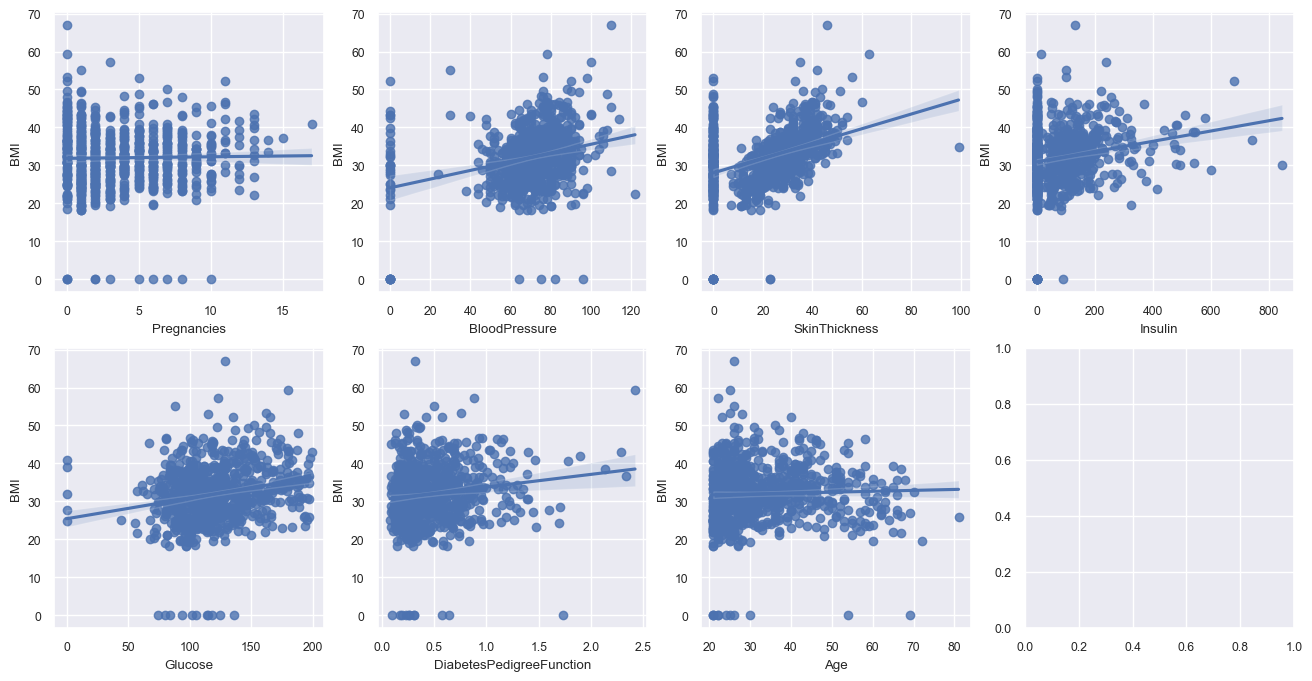

In [78]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Glucose', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='BMI', data=df, ax=axs[row][col])

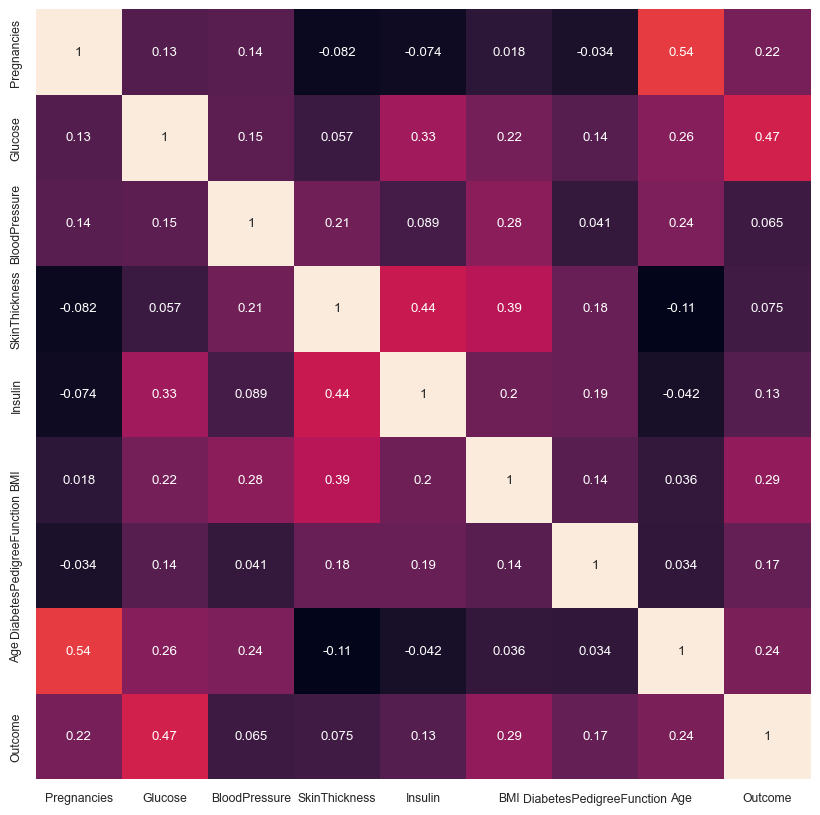

In [79]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

<h3>#데이터셋 나누기</h3>

In [80]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Glucose', 'SkinThickness',
       'BMI']]
y_data=df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 3) (576,)
(192, 3) (192,)


In [81]:
X_train.head()

,Glucose,SkinThickness,BMI
357,129,30,39.9
73,129,20,35.1
352,61,28,34.4
497,81,15,30.1
145,102,23,0.0


In [82]:
X_test.head()

,Glucose,SkinThickness,BMI
668,98,33,34.0
324,112,32,35.7
624,108,0,30.8
690,107,0,24.6
473,136,0,29.9


In [83]:
y_train.head()

357    1
73     0
352    0
497    0
145    0
Name: Outcome, dtype: int64

In [84]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

</h3>#DT, RF, LR, SVM 분류, confusion matrix

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [86]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7239583333333334
[[106  17]
 [ 36  33]]


In [87]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.625
[[85 38]
 [34 35]]


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7083333333333334
[[94 29]
 [27 42]]


<h3>#outcome 제거</h3>

In [89]:
df2 = df.copy()
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [91]:
del df2['Outcome']
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<h3>#회귀 수행(DT, RF, LR, SVM)<h3>

In [92]:
x_data=df2.loc[:, ['Glucose', 'SkinThickness']]
y_data=df2.loc[:, 'BMI']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 2) (576,)
(192, 2) (192,)


In [93]:
X_train.head()

,Glucose,SkinThickness
357,129,30
73,129,20
352,61,28
497,81,15
145,102,23


In [94]:
y_train.head()

357    39.9
73     35.1
352    34.4
497    30.1
145     0.0
Name: BMI, dtype: float64

In [95]:
X_test.head()

,Glucose,SkinThickness
668,98,33
324,112,32
624,108,0
690,107,0
473,136,0


In [96]:
y_test.head()

668    34.0
324    35.7
624    30.8
690    24.6
473    29.9
Name: BMI, dtype: float64

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<h3>#LR회귀</h3>

In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [0.  0.2]
상수항(절편): 22.5


In [99]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(576, 2) (192, 2)


In [100]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 57.988, RMSE: 7.615
Variance score : 0.220


In [101]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 22.453503894848723
회귀계수: [0.  0.2]


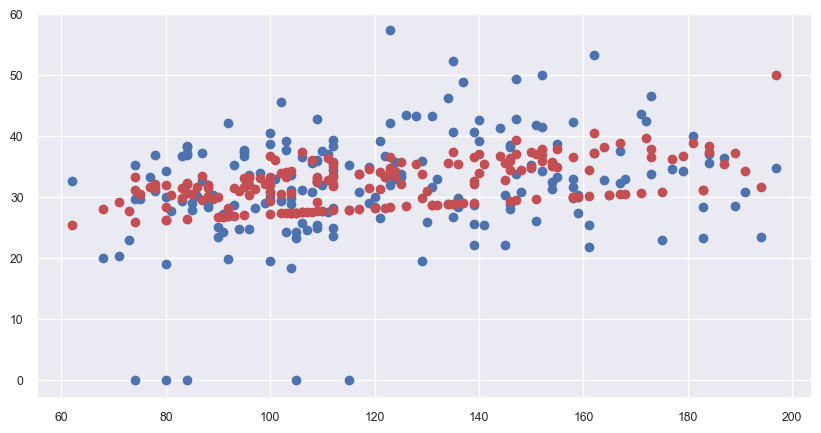

In [102]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 7.614984308883374


<h3>#DT회귀</h3>

In [104]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 9.476143657922178


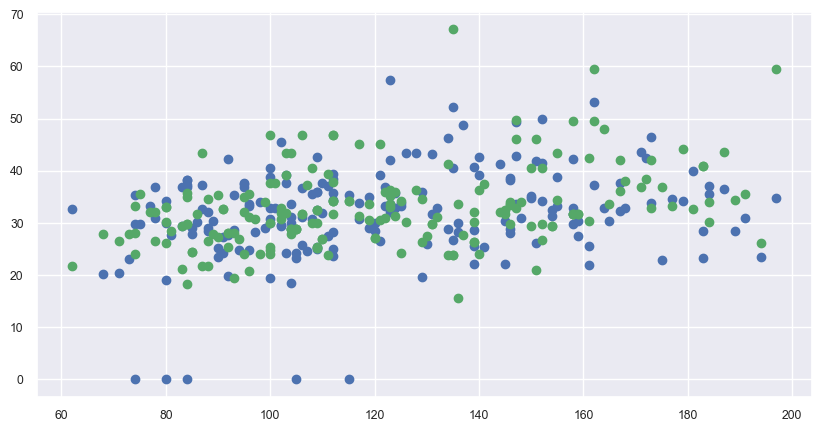

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], dy_preds, c='g', label='dy_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

<h3>#RF회귀<h3>

In [106]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 8.448943507761474


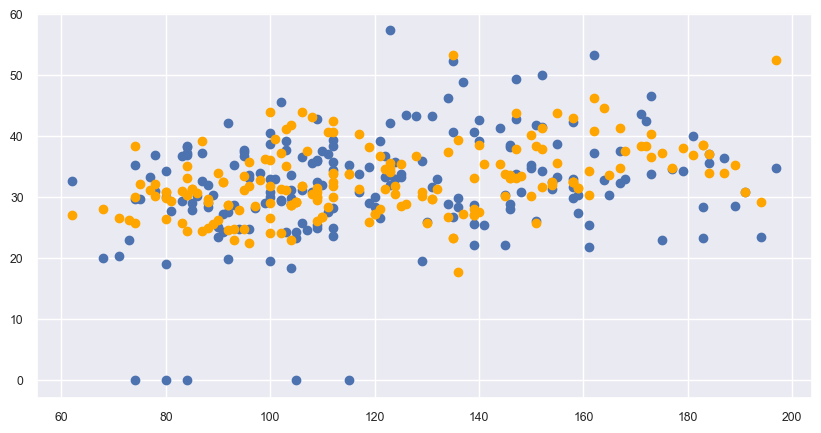

In [107]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], ry_preds, c='orange', label='ry_preds')

plt.show()  

<h3>#SVM회귀</h3>

In [108]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 8.483565312957529


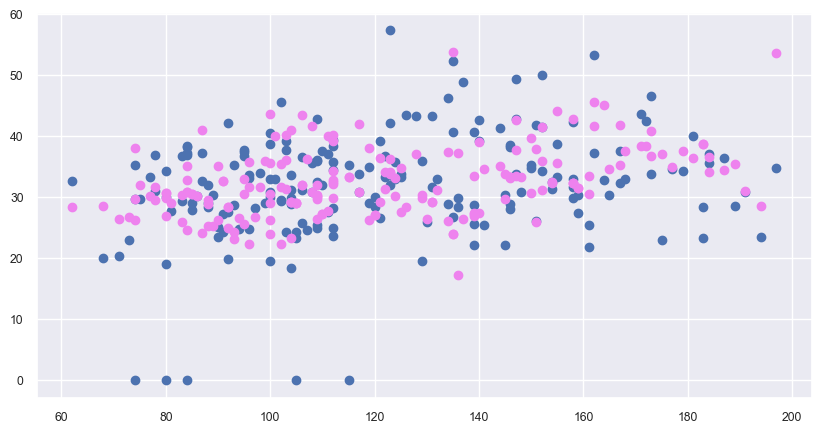

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Glucose'], y_test, label='y_test')
plt.scatter(X_test['Glucose'], sy_preds, c='violet', label='sy_preds')

plt.show()         

<h3>#알파값에따라 달라지는 릿지회귀 값 확인<h3>

In [110]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=12)

#알파값 다르게 하여 훈련시키기
# alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.
#반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.
# [출처] [파이썬][머신러닝][회귀][Ridge] 릿지 회귀 모델 |작성자 하쿠나마타타
# [출처] [파이썬][머신러닝][회귀][Ridge] 릿지 회귀 모델 |작성자 하쿠나마타타
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test,y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트의 정확도 : 0.22
테스트 세트의 정확도 : 0.06
훈련 세트의 정확도 : 0.22
테스트 세트의 정확도 : 0.06
훈련 세트의 정확도 : 0.22
테스트 세트의 정확도 : 0.06


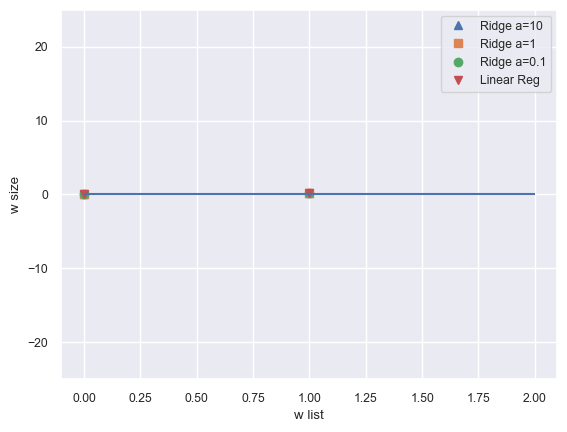

In [111]:
plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'o',label="Ridge a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

<h3>#알파값에따라 달라지는 라쏘회귀 값 확인</h3>

In [112]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test,y_test)))
lasso10 = Lasso(alpha=10).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso10.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso10.score(X_test,y_test)))
lasso5 = Lasso(alpha=5).fit(X_train, y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso5.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso5.score(X_test,y_test)))

훈련 세트의 정확도 : 0.22
테스트 세트의 정확도 : 0.07
훈련 세트의 정확도 : 0.22
테스트 세트의 정확도 : 0.10
훈련 세트의 정확도 : 0.22
테스트 세트의 정확도 : 0.08


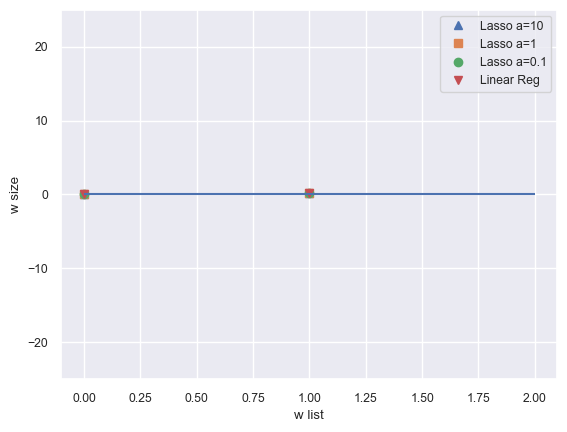

In [113]:
# alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자.
# alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.
# alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절대값의 크기가 작을것이다.(일반화가 쉬워지므로)
plt.plot(lasso10.coef_,'^',label="Lasso a=10")
plt.plot(lasso.coef_,'s',label="Lasso a=1")
plt.plot(lasso5.coef_,'o',label="Lasso a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()